In [16]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import torch
import torchvision.transforms as transforms
import torch.utils.data as td
import torchvision

In [17]:
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images,_ in loader:
        images_count_in_batch = images.size(0)
#         print(images.shape)
        images =images.view(images_count_in_batch,images.size(1),-1)
        mean+=images.mean(2).sum(0)
        std+=images.std(2).sum(0)
        total_images_count+=images_count_in_batch
    mean /= total_images_count
    std /= total_images_count
    return mean,std

In [18]:
def transform(dataset):
    data_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
    data_set=torchvision.datasets.ImageFolder(root=dataset,transform=data_transform)
    data_loader=torch.utils.data.DataLoader(dataset=data_set,batch_size=32,shuffle=True)
    mean,std=get_mean_std(data_loader)
    data_transform = transforms.Compose([
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
    ])
    data_set=torchvision.datasets.ImageFolder(root=dataset,transform=data_transform)
    data_loader=torch.utils.data.DataLoader(dataset=data_set,batch_size=32,shuffle=True,drop_last=False,num_workers=0)
    return data_loader,data_set

In [31]:
def splitfiles():
    dataset='../../dataset_20_classes/'
    train_percent = 0.7
    test_percent = 1 - train_percent
    classes = os.listdir(dataset)
    train_filenames = {}
    test_filenames = {}
    for c in classes:
        class_dir = os.path.join(dataset, c)
        filenames = os.listdir(class_dir)
        train_filenames[c], test_filenames[c] = train_test_split(filenames, test_size=test_percent)
    
    train_folder = '../../data20/dataset_20_classes_training/'
    test_folder = '../../data20/dataset_20_classes_testing/'
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)
    
    for c in classes:
        class_train_folder = os.path.join(train_folder, c)
        class_test_folder = os.path.join(test_folder, c)
        os.makedirs(class_train_folder, exist_ok=True)
        os.makedirs(class_test_folder, exist_ok=True)

        for filename in train_filenames[c]:
            src_path = os.path.join(dataset, c, filename)
            dst_path = os.path.join(class_train_folder, filename)
            shutil.copy2(src_path, dst_path)

        for filename in test_filenames[c]:
            src_path = os.path.join(dataset, c, filename)
            dst_path = os.path.join(class_test_folder, filename)
            shutil.copy2(src_path, dst_path)

In [32]:
splitfiles()


In [34]:
traning_data='../../data20/dataset_20_classes_training/'
dtrain_loader,train_dataset=transform(traning_data)

In [40]:
def show_transformed_images(dataset):
    loader=torch.utils.data.DataLoader(dataset, batch_size=20,shuffle=True)
    batch=next(iter(loader))
    images, labels=batch
    
    grid=torchvision.utils.make_grid(images, nrow=3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid,(1,2,0)))
    print('labels: ',labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([ 5, 15,  7,  5,  9, 14,  7, 11, 19, 19,  1, 19, 12, 16,  2,  1,  7, 19,
         0,  2])


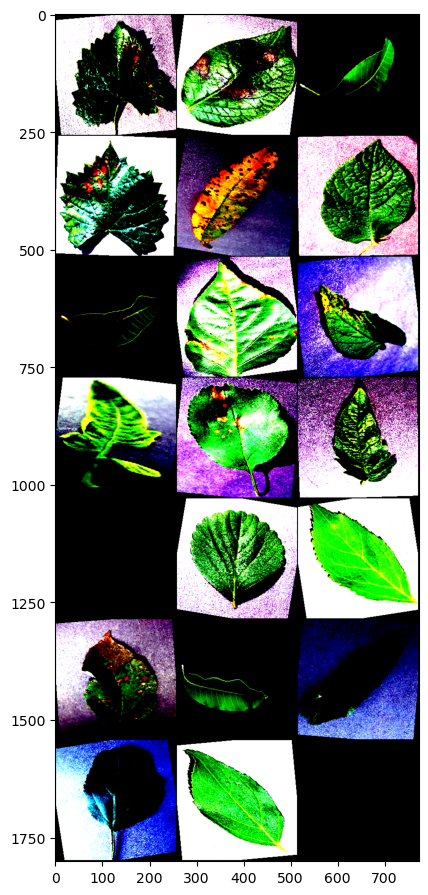

In [41]:
import matplotlib.pyplot as plt
import numpy as np
show_transformed_images(train_dataset)